<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [3]:
ls -1ha kaggle.json

kaggle.json


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d jessicali9530/celeba-dataset

 99% 1.31G/1.33G [00:11<00:00, 230MB/s]
100% 1.33G/1.33G [00:11<00:00, 125MB/s]


In [7]:
!unzip celeba-dataset.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: img_align_celeba/img_align_celeba/197604.jpg  
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/img_align_celeba/197619.jpg  
  in

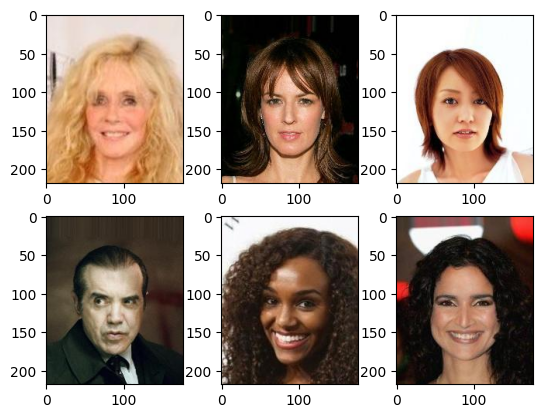

In [9]:
import glob
import matplotlib.pyplot as plt
import os
from PIL import Image

imgs = glob.glob('./img_align_celeba/img_align_celeba/*.jpg')

for i in range(6):
    plt.subplot(2,3,i+1)
    img = Image.open(imgs[i])
    plt.imshow(img)

In [10]:
imgs[0]

'./img_align_celeba/img_align_celeba/017758.jpg'

In [11]:
img.size

(178, 218)

In [12]:
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data.dataloader import DataLoader

In [13]:
transforms = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

dataset = ImageFolder(
    root = './img_align_celeba/',
    transform = transforms
)

loader = DataLoader(dataset , batch_size=128, shuffle=True)

128


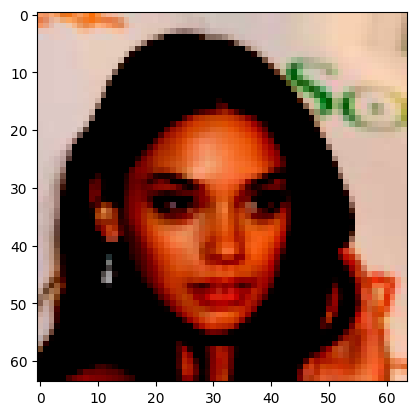

In [15]:
import numpy as np

img, label = next(iter(loader))
print(len(img))
img = img[0].numpy()
plt.imshow(np.transpose(img, (1,2,0)))